In [ ]:
%pylab inline
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [ ]:
N,M  = 100,100
q    = tf.get_variable("q",[N,M])
h,dt = 2.0,0.05

In [ ]:
Lap  = (tf.roll(q,1,0) + tf.roll(q,-1,0) + tf.roll(q,1,1) + tf.roll(q,-1,1)) - 4*q
step = q.assign_add(dt*(Lap/h**2 + q - q**3))

In [ ]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(1000):
    sess.run(step)
  q_ = sess.run(q)

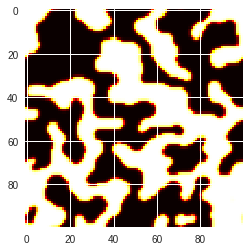

In [ ]:
imshow(q_,cmap="hot");

In [ ]:
R,r = 100,50+q_*5
theta,phi = np.meshgrid(np.linspace(0,2*np.pi,N),np.linspace(0,2*np.pi,M))

x = (R+r*np.cos(theta))*np.cos(phi)
y = (R+r*np.cos(theta))*np.sin(phi)
z = r*np.sin(theta)

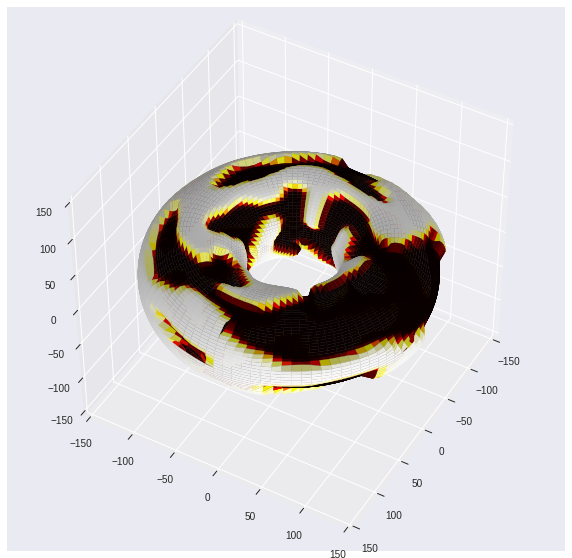

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
f  = figure()
f.set_size_inches(10,10)
ax = f.add_subplot(111, projection='3d')
ax.view_init(45,30)
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_zlim(-150,150)
ax.plot_surface(x,y,z,rcount=N,ccount=M,facecolors=cm.hot((q_+1)/2));